# Pandas Example

This is an example notebook describing the basics of Pandas, a Python library for analyzing and manipulating data. More details are available on the [Pandas Home Page](https://pandas.pydata.org/).

This example uses an [automotive](https://archive.ics.uci.edu/ml/datasets/Automobile) data set from [University of California, Irvine](https://uci.edu/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

Load data from a comma delimited text file. Pandas will assume the first line contains columns names or the columns names can be explicitly specified as in the cell below. The `read_csv` method returns a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which supports many methods.

Pandas can read many types of files, such as text, CSV, Excel, and many others. Pandas can read from files, or from a server using HTTP, FTP, or S3 protocols. You can read more about reading and writing in the [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

### Google Colab Data Download

Use the following commands to download the data into a Google Colab runtime:

```
!mkdir data
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data -P data
```

In [2]:
columnNames = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
               'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
               'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
               'horsepower','peak_rpm','city_mpg','highway_mpg','price']

# First row can contain column names, otherwise specify names
cars = pd.read_csv('data/imports-85.data', sep=',', names = columnNames)

print('Total number of cars: %d' % len(cars))

Total number of cars: 205


Display the first five rows of data, nicely formatted. The `tail` method displays trailing rows in a similar manner. The `head` and `tail` methods return Dataframes containing a subset of rows.

In [3]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Selecting Rows and Columns

One or more rows can be selected from a Dataframe using the slice operator. The result is also a Dataframe.

In [4]:
cars[1:5]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Columns can be selected using the following syntax. In this example two columns and five rows are selected.

In [5]:
cars[['make', 'body_style']].head(5)

,make,body_style
0,alfa-romero,convertible
1,alfa-romero,convertible
2,alfa-romero,hatchback
3,audi,sedan
4,audi,sedan


Rows can be selected based on a condition. Columns can specified in two different ways. Details with comparison to SQL are documented [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html).

In [6]:
cars[(cars.make == 'audi') & (cars['num_of_doors'] == 'four')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


Rows can be selected by index, either numeric or by a label. Details are documented [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). Numeric selection is achieved with the ```iloc()``` method.

In [7]:
# Select a single value by zero-based index

cars.iloc[0].make

'alfa-romero'

In [8]:
# Select several rows using a range

cars.iloc[1:5]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


```values``` field returns a NumPy array.

In [9]:
cars[1:5][['engine_size', 'bore', 'stroke']].values

array([[130, '3.47', '2.68'],
       [152, '2.68', '3.47'],
       [109, '3.19', '3.40'],
       [136, '3.19', '3.40']], dtype=object)

## Inspecting Dataframes

The following cells get information about a dataframe, which can be useful during initial analysis.

In [10]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

The `describe` method produces useful statistics for numeric columns.

In [11]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Pandas attempts to determine the data type of each column. If a column contains differing types, the type is assumed to be object. The cell below shows that some columns that should contain numeric data exclusively, probably does not.

In [12]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

## Series Objects

The columns in a Pandas Dataframe are instances of the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) class. Columns can be referenced as attributes of a Dataframe, assuming column names are value Python identifiers and do not conflict with other Dataframe attributes.

Series objects contain numerous methods, one of which is shown below.

In [13]:
cars.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

```values``` property returns a numpy array.

In [14]:
cars[1:5].price.values

array(['16500', '16500', '13950', '17450'], dtype=object)

## Sorting

Dataframe and Series objects can be sorted by one or more columns. In the following cell, the price column contains non-numeric values, which becomes evident upon sorting.

In [15]:
cars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995


## Data Type Conversion

In order to convert the price column to a numeric type, it is necessary to select only rows that contain numeric values. It is also necessary to make a `copy` of the resulting Dataframe to avoid `SettingWithCopyWarning` which can occurr when values are assigned to a Dataframe.

In [16]:
# copy() avoids SettingWithCopyWarning

pricedCars = cars[cars.price.str.isnumeric()].copy()
pricedCars.price = pricedCars.price.astype(float)
pricedCars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [17]:
pricedCars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [18]:
pricedCars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Aggregation

The groupby method can be used to group data by a column or a set of columns and apply and aggregate function, such as count, min, max, etc.

In [19]:
pricedCars.groupby(['make']).max().head(5)

,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,?,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,3.47,3.47,9.00,154,5000,21,27,16500.0
audi,2,?,gas,turbo,two,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,10.00,140,5500,24,30,23875.0
bmw,2,?,gas,std,two,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,9.00,182,5800,23,29,41315.0
chevrolet,2,98,gas,std,two,sedan,fwd,front,94.5,158.8,...,90,2bbl,3.03,3.11,9.60,70,5400,47,53,6575.0
dodge,3,148,gas,turbo,two,wagon,fwd,front,103.3,174.6,...,156,mpfi,3.60,3.90,9.41,88,5500,37,41,12964.0


In [20]:
pricedCars.groupby(['make', 'body_style']).max().head(5)

symboling normalized_losses fuel_type aspiration  \
make        body_style                                                      
alfa-romero convertible          3                 ?       gas        std   
            hatchback            1                 ?       gas        std   
audi        sedan                2                 ?       gas      turbo   
            wagon                1                 ?       gas        std   
bmw         sedan                2                 ?       gas        std   

                        num_of_doors drive_wheels engine_location  wheel_base  \
make        body_style                                                          
alfa-romero convertible          two          rwd           front        88.6   
            hatchback            two          rwd           front        94.5   
audi        sedan                two          fwd           front       105.8   
            wagon               four          fwd           front       105.8   
bmw         sedan                two          rwd           front       110.0   

                         length  width  ...  engine_size  fuel_system  bore  \
make        body_style                  ...                                   
alfa-romero convertible   168.8   64.1  ...          130         mpfi  3.47   
            hatchback     171.2   65.5  ...          152         mpfi  2.68   
audi        sedan         192.7   71.4  ...          136         mpfi  3.19   
            wagon         192.7   71.4  ...          136         mpfi  3.19   
bmw         sedan         197.0   70.9  ...          209         mpfi  3.62   

                        stroke  compression_ratio horsepower peak_rpm  \
make        body_style                                                  
alfa-romero convertible   2.68                9.0        111     5000   
            hatchback     3.47                9.0        154     5000   
audi        sedan         3.40               10.0        140     5500   
            wagon         3.40                8.5        110     5500   
bmw         sedan         3.39                9.0        182     5800   

                        city_mpg  highway_mpg    price  
make        body_style                                  
alfa-romero convertible       21           27  16500.0  
            hatchback         19           26  16500.0  
audi        sedan             24           30  23875.0  
            wagon             19           25  18920.0  
bmw         sedan             23           29  41315.0  

[5 rows x 24 columns]

The ```groupby``` method returns a DataFrameGroupBy object. It is possible to iterate over a DataFrameGroupBy object.

In [21]:
groups = pricedCars.groupby(['make'])

# groupDF is a DataFrame containing all rows withing a group.
for groupName, groupDF in groups:
    print(groupName, len(groupDF))

alfa-romero 3
audi 6
bmw 8
chevrolet 3
dodge 9
honda 13
isuzu 2
jaguar 3
mazda 17
mercedes-benz 8
mercury 1
mitsubishi 13
nissan 18
peugot 11
plymouth 7
porsche 4
renault 2
saab 6
subaru 12
toyota 32
volkswagen 12
volvo 11


## Visualization

Pandas data frames contain methods the create many kinds of plots using [Matplotlib](https://matplotlib.org). Pandas plotting methods are documented in the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016832B41A58>]],
      dtype=object)

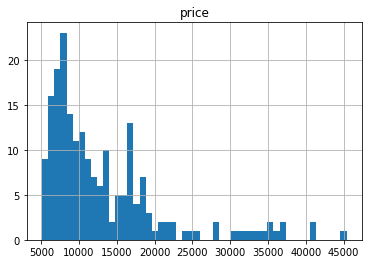

In [22]:
pricedCars.hist('price', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016832B1E278>]],
      dtype=object)

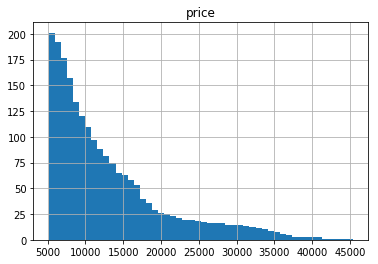

In [23]:
pricedCars.hist('price', bins=50, cumulative=-1)

In [24]:
hpPricedCars = pricedCars[pricedCars.horsepower.str.isnumeric()].copy()
hpPricedCars.horsepower = hpPricedCars.horsepower.astype(float)

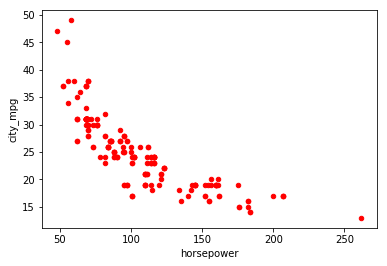

In [25]:
hpPricedCars.plot.scatter(x='horsepower', y='city_mpg', color='red')

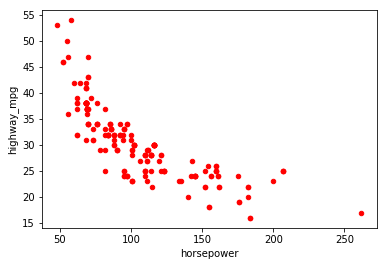

In [26]:
hpPricedCars.plot.scatter(x='horsepower', y='highway_mpg', color='red')

In [27]:
priceGroups = pricedCars.groupby(['make'])['price']
means = priceGroups.mean()
std = priceGroups.std()

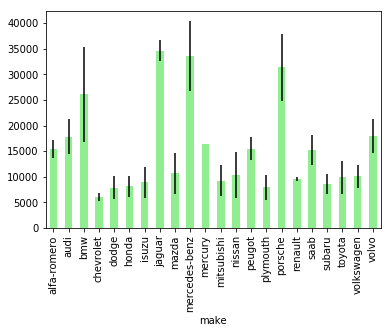

In [28]:
fig, ax = plt.subplots()
means.plot.bar(ax=ax, yerr=std, color='lightgreen')